We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. 
 
Task: 
 
1. fitting it to the periodic function 
 
2. plot the fit 
 
Data 
 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns

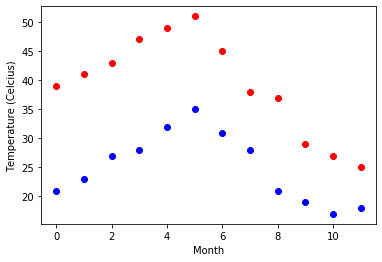

In [2]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Temperature (Celcius)')

       #here we will plot to see how curve is ploted and how we can define periodic function
plt.show()            

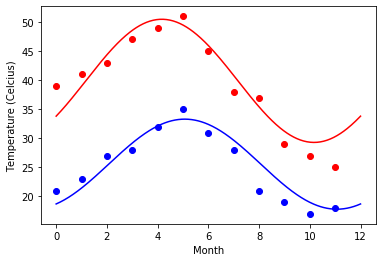

In [3]:
#Periodic function
'''Firstly we will see for sin(0) is zero so we ill use cos() function to define function
    we will take four arguments time , average of data set,amplitude and offset for time(optional for better accuraccy)
    function = avg + ampli(cos(time+offset)*(2*pi/max_of_time))
    
    (2*pi/max_of_time)*(time) will defines value repeat after 2pi'''
    
def yearly_temp(time, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((time + time_offset) * 2 * np.pi / time.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      temp_max)
res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      temp_min)

#res_max,res_min will provide optimize values and
#cov_max,cov_min will give co variance of res_max,res_min


days = np.linspace(0, 12, num=365)    #curve according to days or month
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')  
plt.plot(days, yearly_temp(days, *res_max), 'r-')
#*res_min,*res_max will pass to function(avg,amplitude,time_offset)
plt.xlabel('Month')
plt.ylabel('Temperature (Celcius)')
plt.show()


This assignment is for visualization using matplotlib: 
 
data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 
 
Charts to plot: 
 
1. Create a pie chart presenting the male/female proportion 
 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv',
               skip_blank_lines=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


([<matplotlib.patches.Wedge at 0x266f5dfbac8>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40 '),
  Text(0.26227455249853165, -0.5396406759239846, '35.60 ')])

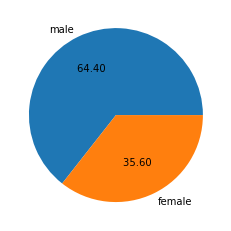

In [5]:
male=df.loc[df.sex=='male'].count()[0]
female=df.loc[df.sex=='female'].count()[0]
plt.pie([male,female],labels=['male','female'],autopct='%.2f ')

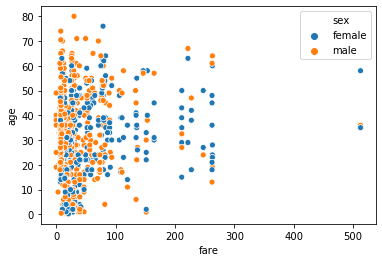

In [6]:
sns.scatterplot(df.fare,df.age,hue=df.sex)